In [1]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
%matplotlib inline
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as pl
# Load the online news dataset
df = pd.read_csv("normalized.csv")
display(df.head())

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.872236,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0.0
1,9.0,255.0,0.845649,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0.0
2,9.0,211.0,0.831614,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1.0
3,9.0,531.0,0.795700,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0.0
4,13.0,1072.0,0.746290,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0.0


In [2]:
X = df.drop(["shares"],axis=1)
y = df["shares"]

In [3]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

In [4]:
X = pd.DataFrame(X, columns = ["n_tokens_title", 
                                "n_tokens_content","n_unique_tokens","num_hrefs","num_self_hrefs","num_imgs","num_videos", 
                                "average_token_length","num_keywords","data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus","data_channel_is_socmed",
                                "data_channel_is_tech","data_channel_is_world","kw_min_min", "kw_max_min","kw_min_max","kw_max_max",
                                "kw_avg_max","kw_min_avg","kw_max_avg","kw_avg_avg","self_reference_min_shares","self_reference_max_shares",
                                "self_reference_avg_sharess","weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday","weekday_is_friday",
                                "weekday_is_saturday","weekday_is_sunday","is_weekend","LDA_00","LDA_01","LDA_02","LDA_03","LDA_04",
                                "global_subjectivity","global_sentiment_polarity","global_rate_positive_words","global_rate_negative_words",
                                "rate_positive_words","rate_negative_words","avg_positive_polarity","min_positive_polarity","max_positive_polarity",
                                "avg_negative_polarity","min_negative_polarity","max_negative_polarity",
                                "title_subjectivity","title_sentiment_polarity","abs_title_subjectivity","abs_title_sentiment_polarity"])

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [6]:
!pip install ggplot

C:\Users\lalwa\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\lalwa\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\lalwa\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


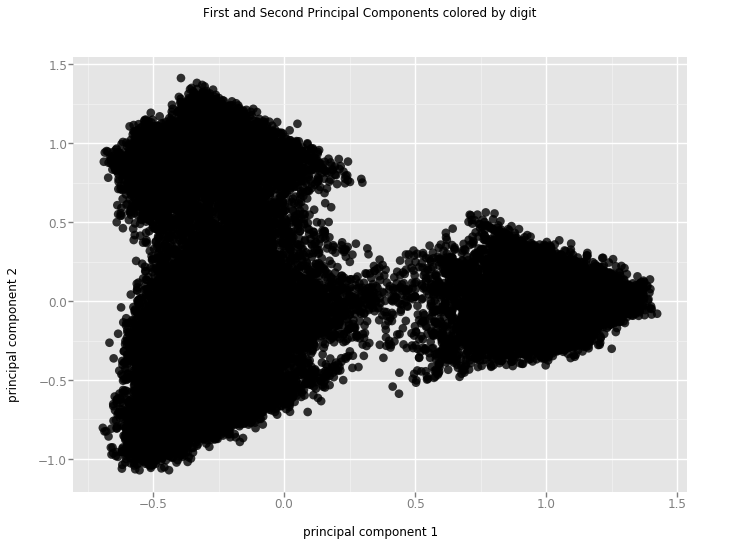

<ggplot: (-9223371905490230861)>

In [7]:
from ggplot import *

chart = ggplot(principalDf, aes(x='principal component 1', y='principal component 2') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")
chart

In [8]:
from sklearn import cluster
k_means=cluster.KMeans(n_clusters=3)
k_means.fit(principalDf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
print(k_means.labels_)

[0 0 1 ... 0 2 0]


In [10]:
df2=pd.DataFrame(k_means.labels_,columns=['label'])
df1=pd.concat([df, df2], axis=1)

In [11]:
df1

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,label
0,12.0,219.0,0.872236,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,...,0.700000,-0.350000,-0.600000,-0.200000,0.500000,-0.187500,0.000000,0.187500,0.0,0
1,9.0,255.0,0.845649,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,...,0.700000,-0.118750,-0.125000,-0.100000,0.000000,0.000000,0.500000,0.000000,0.0,0
2,9.0,211.0,0.831614,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,...,1.000000,-0.466667,-0.800000,-0.133333,0.000000,0.000000,0.500000,0.000000,1.0,1
3,9.0,531.0,0.795700,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,...,0.800000,-0.369697,-0.600000,-0.166667,0.000000,0.000000,0.500000,0.000000,0.0,0
4,13.0,1072.0,0.746290,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,...,1.000000,-0.220192,-0.500000,-0.050000,0.454545,0.136364,0.045455,0.136364,0.0,1
5,10.0,370.0,0.824202,2.0,2.0,0.0,0.0,4.359459,9.0,0.0,...,0.600000,-0.195000,-0.400000,-0.100000,0.642857,0.214286,0.142857,0.214286,0.0,1
6,8.0,960.0,0.747794,21.0,20.0,20.0,0.0,4.654167,10.0,1.0,...,1.000000,-0.224479,-0.500000,-0.050000,0.000000,0.000000,0.500000,0.000000,0.0,1
7,12.0,989.0,0.756869,20.0,20.0,20.0,0.0,4.617796,9.0,0.0,...,1.000000,-0.242778,-0.500000,-0.050000,1.000000,0.500000,0.500000,0.500000,0.0,1
8,11.0,97.0,0.875079,2.0,0.0,0.0,0.0,4.855670,7.0,0.0,...,0.800000,-0.125000,-0.125000,-0.125000,0.125000,0.000000,0.375000,0.000000,1.0,1
9,10.0,231.0,0.860139,4.0,1.0,1.0,1.0,5.090909,5.0,0.0,...,0.500000,-0.238095,-0.500000,-0.100000,0.000000,0.000000,0.500000,0.000000,0.0,2


In [12]:
df1['label'].value_counts()

0    22430
1     8681
2     8533
Name: label, dtype: int64

In [13]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1.drop('label',axis =1), df1['label'], test_size=0.3, random_state=0)

C:\Users\lalwa\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
Cluster0=df1[df1.label==0]
Cluster0.drop('label',axis=1)
Cluster0.to_csv('Cluster0.csv',index=False)

Cluster1=df1[df1.label==1]
Cluster1.drop('label',axis=1)
Cluster1.to_csv('Cluster1.csv',index=False)

Cluster2=df1[df1.label==2]
Cluster2.drop('label',axis=1)
Cluster2.to_csv('Cluster2.csv',index=False)
